An Aircraft is said to be delayed when it arrives late for 15 minutes or more than the
scheduled time of arrival and the delay time is calculated by the number of minutes after
the flight was considered as delayed (i.e., after 15 minutes of scheduled tie of arrival).

The airlines report the cause for the delay based on five categories:
1.Air Carrier: Delay due to circumstances within the airlines.
2.Extreme Weather: Delay of flight due to some weather conditions such as Hurricanes,
Tornado, etc.
3.National Aviation System (NAS): Delay due to some conditions such as non-extreme
weather conditions, airport operations, heavy traffic volume and air traffic control.
4.Late-Arriving Aircraft: A previous flight with same aircraft arriving late, causing the
present flight to depart late.
5.Security: Delay of aircraft due to some security breach.


The marketing carrier networks are:
Alaska Airlines (AS)*
Allegiant Air (G4)
American Airlines (AA)*
Delta Air Lines (DL)*
Frontier Airlines (F9)
Hawaiian Airlines (HA)*
JetBlue Airways (B6)
Southwest Airlines (WN)
Spirit Airlines (NK)
United Airlines (UA)*
*Includes branded code-share partners
The reporting airlines are:
Alaska Airlines (AS)
Allegiant Air (G4)
American Airlines (AA)
Delta Air Lines (DL)
Endeavor Air (9E)
Envoy Air (MQ)
Frontier Airlines (F9)
Hawaiian Airlines (HA)
Horizon Air (QX)
JetBlue Airways (B6)
Mesa Airlines (YV)
PSA Airlines (OH)
Republic Airlines (YX)
SkyWest Airlines (OO)
Southwest Airlines (WN)
Spirit Airlines (NK)
United Airlines (UA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Airline_Delay_Cause.csv")

In [3]:
df.shape

(318017, 21)

### The dataset has 318017 rows and 21 columns

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [5]:
df.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0
318016,2003,6,DL,Delta Air Lines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",3466.0,454.0,121.15,7.61,...,1.0,102.33,9.0,0.0,16853.0,5384.0,306.0,5686.0,28.0,5449.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

### The dataset has 4 object(string) columns(carrier_name,carrier,airport_name,airport), 2 integer columns(year,month) and and remaining all other columns are of float type.

In [7]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,318017.000000,318017.000000,317529.000000,317289.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000
mean,2012.450957,6.497844,381.763984,72.904403,21.072980,2.616379,24.005228,0.179037,24.975734,7.207257,0.867672,4209.947536,1286.583503,220.567542,1099.516422,7.214799,1596.062993
std,5.678296,3.459423,1027.148994,198.935595,47.671306,9.968549,85.113757,0.844834,75.275223,37.216301,3.915760,12518.907854,3515.397263,861.521440,4636.475908,38.854566,4924.950687
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.000000,0.000000,1.680000,0.000000,1.640000,0.000000,0.000000,436.000000,148.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.190000,0.580000,5.490000,0.000000,5.860000,1.000000,0.000000,1201.000000,437.000000,25.000000,203.000000,0.000000,351.000000
75%,2018.000000,10.000000,273.000000,56.000000,19.690000,2.000000,15.350000,0.000000,17.040000,4.000000,1.000000,3080.000000,1100.000000,159.000000,602.000000,0.000000,1110.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


In [8]:
# CHECK WHAT COLUMNS ARE THERE IN THE DATASET
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

## DATA CLEANING

### CHECKING IF THE DATA HAS NULL VALUES

In [9]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            488
arr_del15              728
carrier_ct             488
weather_ct             488
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           488
arr_delay              488
carrier_delay          488
weather_delay          488
nas_delay              488
security_delay         488
late_aircraft_delay    488
dtype: int64

### The data has null values but as compared to the size of the dataset it is very low in number, Now lets check the percentage of missing values in each column.

In [10]:
df.isnull().sum()/df.shape[0]*100

year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.153451
arr_del15              0.228919
carrier_ct             0.153451
weather_ct             0.153451
nas_ct                 0.153451
security_ct            0.153451
late_aircraft_ct       0.153451
arr_cancelled          0.153451
arr_diverted           0.153451
arr_delay              0.153451
carrier_delay          0.153451
weather_delay          0.153451
nas_delay              0.153451
security_delay         0.153451
late_aircraft_delay    0.153451
dtype: float64

### Percentage of missing values is less than 1% so dropping the null values will not show any effect on the data.

In [11]:
df1 = df.dropna()

In [12]:
df1.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

### There are no more null values in the dataset, all the null values are dropped from the dataset

# Data Analysis

In [13]:
df1.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000
mean,2012.446356,6.498315,382.046226,72.904403,21.088920,2.618358,24.023386,0.179172,24.994626,7.206317,0.868193,4213.131974,1287.556685,220.734381,1100.348105,7.220257,1597.270268
std,5.677271,3.459955,1027.486006,198.935595,47.685808,9.972059,85.143379,0.845139,75.300552,37.227520,3.917172,12523.106018,3516.548396,861.825845,4638.130463,38.868752,4926.617274
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.010000,0.000000,1.690000,0.000000,1.650000,0.000000,0.000000,437.000000,149.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.210000,0.580000,5.500000,0.000000,5.870000,1.000000,0.000000,1203.000000,437.000000,25.000000,203.000000,0.000000,352.000000
75%,2018.000000,10.000000,274.000000,56.000000,19.710000,2.000000,15.370000,0.000000,17.050000,4.000000,1.000000,3083.000000,1101.000000,159.000000,602.000000,0.000000,1111.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


### Min and Max value gives the min and max time delay for each cause and mean value gives the average time for each cause.
### For Example, weather_deay has the max time delay of 57707 and min time delay of 0 and avg time delay of 220.734381	

In [14]:
# Now lets check the number if uniques value in carrier_name
len(df1.carrier_name.unique())

33

In [15]:
print(df1.carrier_name.unique())

['Endeavor Air Inc.' 'American Airlines Inc.' 'Alaska Airlines Inc.'
 'JetBlue Airways' 'Delta Air Lines Inc.' 'Frontier Airlines Inc.'
 'Allegiant Air' 'Hawaiian Airlines Inc.' 'Envoy Air' 'Spirit Air Lines'
 'PSA Airlines Inc.' 'SkyWest Airlines Inc.' 'Horizon Air'
 'United Air Lines Inc.' 'Southwest Airlines Co.' 'Mesa Airlines Inc.'
 'Republic Airline' 'ExpressJet Airlines LLC' 'ExpressJet Airlines Inc.'
 'Virgin America' 'US Airways Inc.' 'AirTran Airways Corporation'
 'American Eagle Airlines Inc.' 'Pinnacle Airlines Inc.'
 'Atlantic Southeast Airlines' 'Continental Air Lines Inc.' 'Comair Inc.'
 'Northwest Airlines Inc.' 'Aloha Airlines Inc.' 'ATA Airlines d/b/a ATA'
 'Independence Air' 'America West Airlines Inc.' 'Atlantic Coast Airlines']


### The dataset contains the data of above 33 airlines

In [16]:
# CHECK HOW MANY AIRPORTS ARE THERE IN THE DATASET AFTER CLEANING THE DATASET
len(df1.airport.unique())

418

In [17]:
df1.airport.unique()

array(['ABE', 'ABY', 'ACK', 'AEX', 'AGS', 'ALB', 'ATL', 'ATW', 'AUS',
       'AVL', 'AZO', 'BGM', 'BGR', 'BHM', 'BMI', 'BNA', 'BOS', 'BQK',
       'BTR', 'BTV', 'BUF', 'BWI', 'CAE', 'CHA', 'CHO', 'CHS', 'CID',
       'CLE', 'CLT', 'CMH', 'CRW', 'CSG', 'CVG', 'CWA', 'DAY', 'DCA',
       'DHN', 'DLH', 'DSM', 'DTW', 'EVV', 'EWR', 'EYW', 'FAY', 'FSD',
       'FWA', 'GNV', 'GPT', 'GRR', 'GSO', 'GSP', 'GTR', 'HPN', 'ILM',
       'IND', 'ITH', 'JFK', 'LAN', 'LEX', 'LFT', 'LGA', 'MBS', 'MCI',
       'MEM', 'MGM', 'MKE', 'MLI', 'MLU', 'MOB', 'MOT', 'MSN', 'MSP',
       'MYR', 'OAJ', 'OMA', 'ORD', 'ORF', 'ORH', 'PIT', 'PVD', 'RDU',
       'RIC', 'ROA', 'ROC', 'RST', 'SAV', 'SBN', 'SDF', 'SGF', 'SHV',
       'STL', 'SYR', 'TLH', 'TRI', 'TVC', 'TYS', 'VLD', 'XNA', 'ABQ',
       'AMA', 'ANC', 'AVP', 'BDL', 'BOI', 'BUR', 'BZN', 'COS', 'DEN',
       'DFW', 'EGE', 'ELP', 'EUG', 'FAT', 'FCA', 'FLL', 'GEG', 'HNL',
       'IAD', 'IAH', 'ICT', 'JAX', 'KOA', 'LAS', 'LAX', 'LBB', 'LIH',
       'LIT', 'MCO',

### The dataset has the information about 418 airports.

In [18]:
len(df1.year.unique())

20

In [19]:
df1.year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003])

### dataset contains data from year 2003 - 2022

## Now lets check which year has the most and least number of delays.

In [20]:
df1.year.value_counts()

2019    20927
2021    19929
2007    19485
2008    18885
2020    18599
2006    18062
2009    17637
2010    17554
2018    17111
2005    17006
2004    16689
2013    16068
2011    15567
2012    14366
2014    13957
2015    13513
2017    12503
2016    12195
2003     8757
2022     8479
Name: year, dtype: int64

### The year 2019 has the most number of entries that means 2019 year has the most number of delays in airlines.
### And the year 2022 has the least number of entries which meas it has the least number of delays.

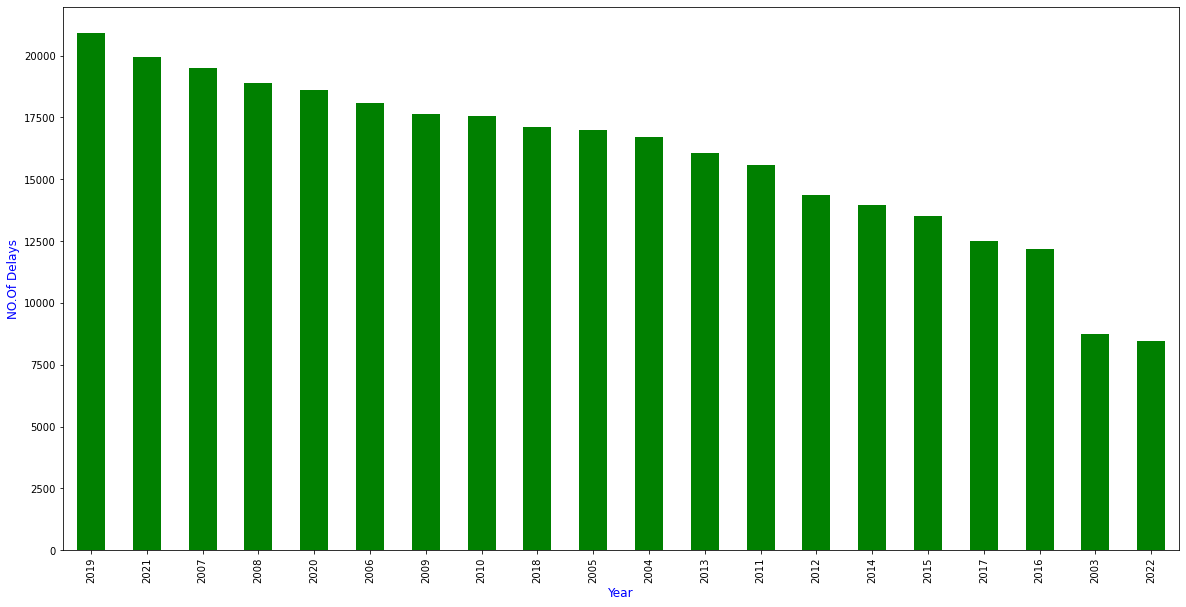

In [21]:
df1['year'].value_counts().plot(kind = 'bar',color="Green",figsize=(20,10))
plt.xlabel("Year",fontdict={'fontsize':12,'fontweight':3,'color':'Blue'})
plt.ylabel("NO.Of Delays",fontdict={'fontsize':12,'fontweight':3,'color':'Blue'})
plt.show()

### From the above Bargraph we can clearly see that tha year 2019 has the most number of delays and 2022 has the least number of delays.

#### Questions

In [22]:
# which is the most delayed airline and the main cause for the delay
# which airport has most delays
# Reason for most of the delays
# which airport has least number of delays and which airlines has the least
# What is the max time delay for each airport and airlines

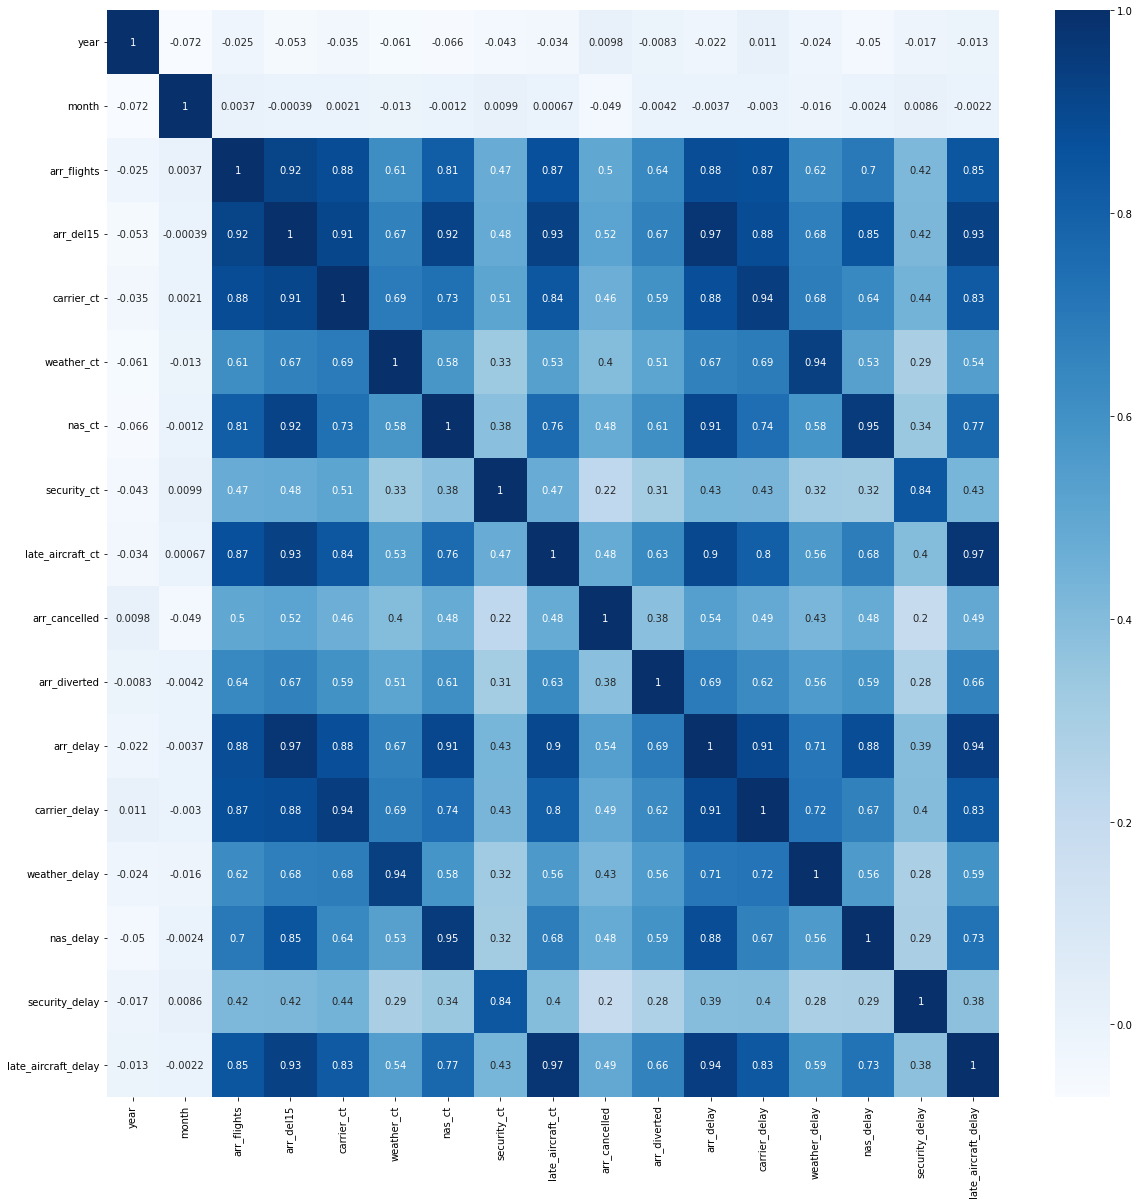

In [61]:
fig = plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(),annot=True,cmap="Blues")
plt.show()

### From the above heatmap we can infer that (arr_del15,arr_delay) ,(carrier_ct,carrier_delay) ,(weather_ct,weather_delay) ,(nas_ct,nas_delay) ,(security_ct, security_delay) ,(late_aircraft_ct,late_aircraft_delay) have correlation value almost equal to 1.So, lets ignore arr_del15, carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct columns and continue our analysis with arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay columns.

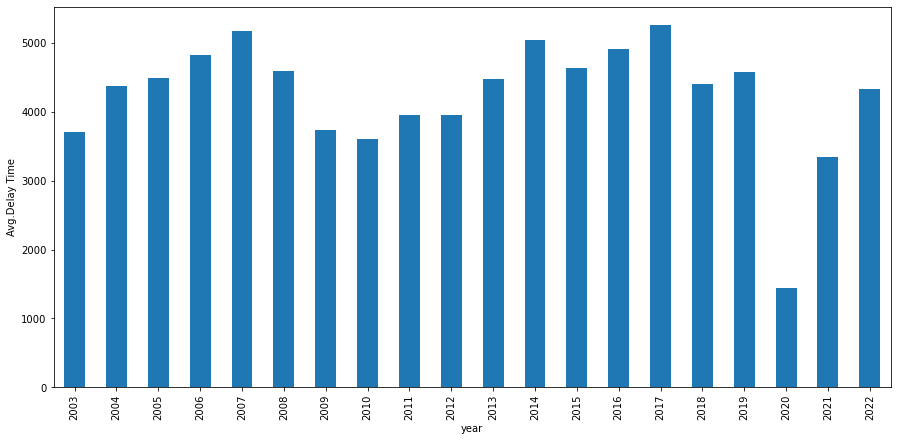

In [65]:
# the above bar graph is for the most number of delays now lets check for the years which has highest average time of delay.
df1.groupby('year')["arr_delay"].mean().plot(kind = "bar",figsize=(15,7))
plt.ylabel("Avg.Delay Time")
plt.show()

### From the above bar graph we can see that 2007 and 2017 are the year that are having highest average delay time.

## Lets check in the year 2019 which airlines delayed the most.

In [23]:
df1_2019 = df1[df1['year'] == 2019]

In [24]:
len(df1_2019)

20927

<AxesSubplot:xlabel='month'>

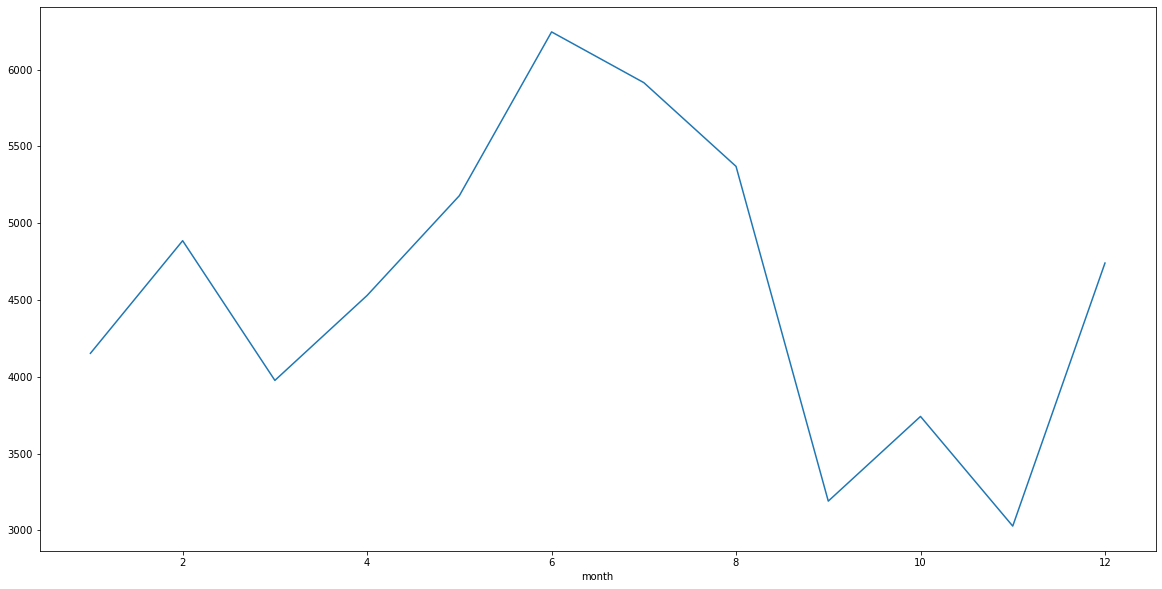

In [25]:
#lets check in which month the flights have delayed most
df1_2019.groupby('month').mean()['arr_delay'].plot(kind='line',figsize=(20,10))

### From the above graph we can cleary see that delay time started increasing in between the march to may which is summer season and in this season most of the travel.

In [26]:
#Lets check which airlines has most delays.
df1_2019.carrier.value_counts()

OO    2957
DL    1729
MQ    1707
G4    1431
YV    1331
UA    1263
AA    1256
9E    1203
F9    1180
EV    1155
YX    1110
OH    1106
WN    1048
AS     865
B6     784
NK     577
HA     225
Name: carrier, dtype: int64

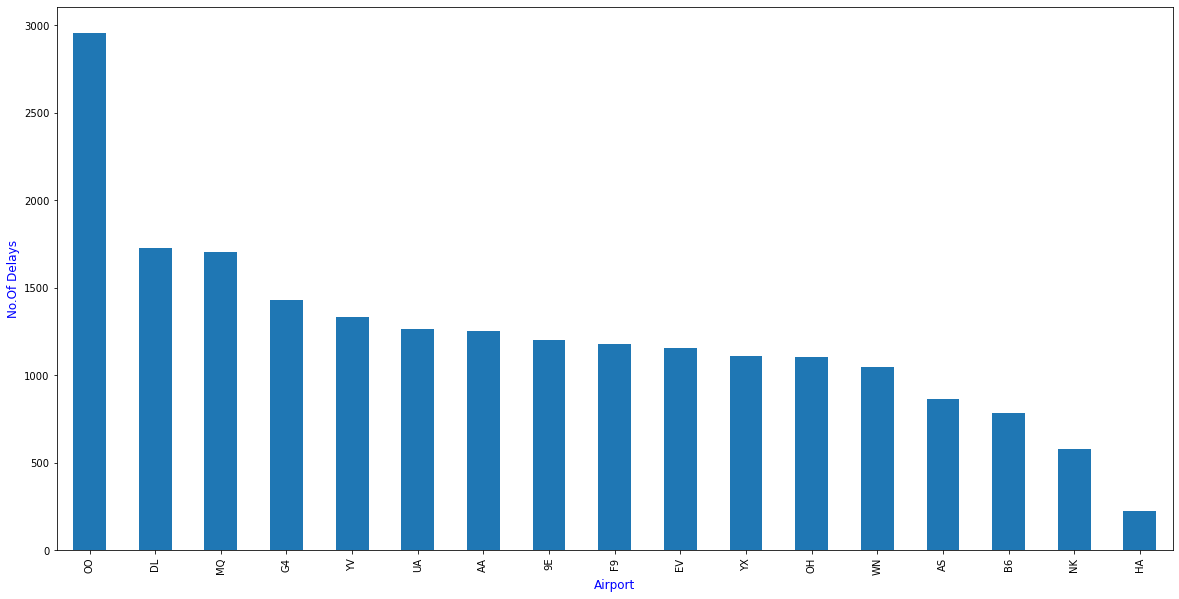

In [27]:
df1_2019['carrier'].value_counts().plot(kind = "bar",figsize=(20,10))
plt.xlabel("Airport",fontdict={'fontsize':12,'fontweight':3,'color':'Blue'})
plt.ylabel("No.Of Delays",fontdict={'fontsize':12,'fontweight':3,'color':'Blue'})
plt.show()

### SkyWest Airlines(OO) has the most number delays in the year 2019

In [28]:
#Lets now perfrom univariate analysis on arr_cancelled
df1.arr_cancelled.describe()

count    317289.000000
mean          7.206317
std          37.227520
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        4951.000000
Name: arr_cancelled, dtype: float64

In [29]:
# now lets fetch the details of that which has the max number of cancelled flights
df1[df1['arr_cancelled'] == df1.arr_cancelled.max()][['year','month','carrier','carrier_name','airport','airport_name','arr_flights','arr_cancelled']]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_cancelled
42296,2020,3,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",20669.0,4951.0


### We can see that in the month of march of year 2020 DL carrier reported the most number of filghts cancelled whichis 4951 out of 20669.

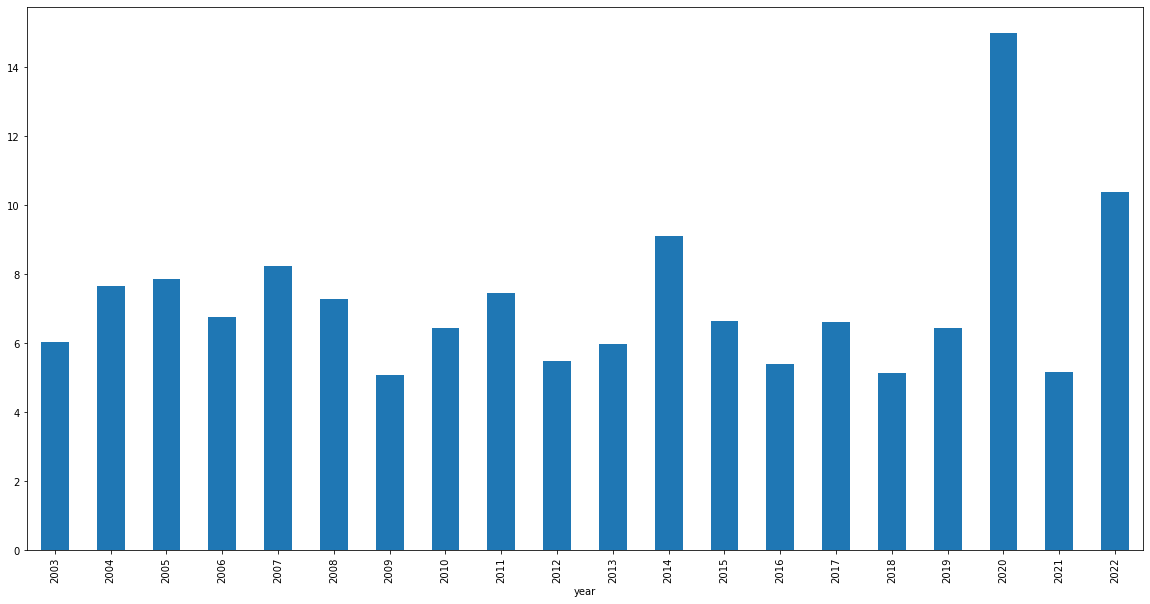

In [30]:
#Lets plot the graph for year and arr_cancelled columns.
df1.groupby("year")["arr_cancelled"].mean().plot(kind='bar',figsize=(20,10))
plt.show()

### From the above bar graph we can clearly see that 2020 has the most number of flights cancelled and the reason is in that year corona outbreak took place and at that time most of the countries have announced lockdown.

In [31]:
# Now lets check the statistical values of each delay cause
#carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay are five types of delay causes
df1.carrier_delay.describe()

count    317289.000000
mean       1287.556685
std        3516.548396
min           0.000000
25%         149.000000
50%         437.000000
75%        1101.000000
max      196944.000000
Name: carrier_delay, dtype: float64

### The max time of delay that has caused due to carrier_delay is 196944 minutes and on average the flights have delayed for 1288 minutes due to carrier delay.

In [32]:
# Lets fetch the details of the flight which has delayed for max time due to carrier delay
df1[df1['carrier_delay'] == df1.carrier_delay.max()][['year','month','carrier','carrier_name','airport','airport_name','arr_flights','arr_cancelled',"carrier_delay"]]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_cancelled,carrier_delay
102229,2016,8,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",21977.0,598.0,196944.0


### Delta Air Lines is the carrier that has delayed for 196944 minutes due to carrier delay in the 8th month of year 2016.

In [33]:
#Lets now perform univariate analysis on weather_delay column
df1.weather_delay.describe()

count    317289.000000
mean        220.734381
std         861.825845
min           0.000000
25%           0.000000
50%          25.000000
75%         159.000000
max       57707.000000
Name: weather_delay, dtype: float64

### The maximun number of minutes of delay that has caused f=due to weather is 57707 mins and on an average the flights got delayed for 221 mins due to weather.

In [34]:

df1[df1['weather_delay'] == df1.weather_delay.max()][['year','month','carrier','carrier_name','airport','airport_name',"weather_delay"]]

,year,month,carrier,carrier_name,airport,airport_name,weather_delay
246528,2007,7,EV,Atlantic Southeast Airlines,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",57707.0


### In the month of july the flight has delayed for max time in the year of 2007 and july is the month of rainy season and this the main reason that flight might have got delayed for max time.

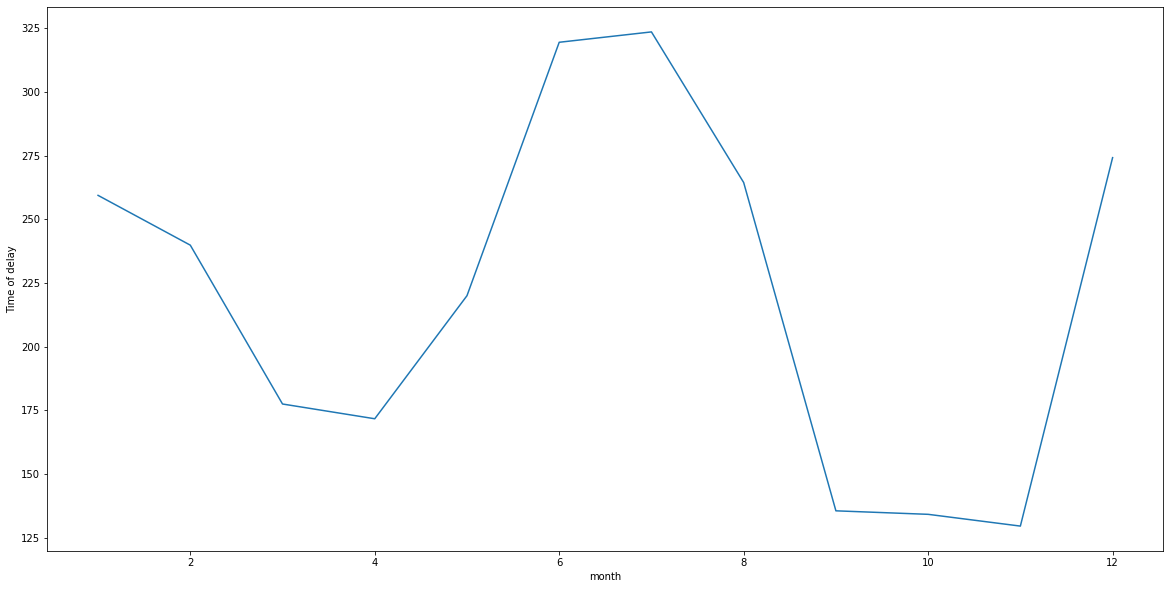

In [35]:
# now plot a graph for month vs weather_delay
df1.groupby("month")["weather_delay"].mean().plot(kind = 'line', figsize=(20,10))
plt.ylabel("Time of delay")
plt.show()

### The graph started rising from 4th month in which we will get started with rains and went to maximum in the months on 6, 7 and 8, these are the months in which we will getting heavy rains.

In [36]:
# lets perform univariate analysis on nas_delay column
df1.nas_delay.describe()

count    317289.000000
mean       1100.348105
std        4638.130463
min         -19.000000
25%          56.000000
50%         203.000000
75%         602.000000
max      238440.000000
Name: nas_delay, dtype: float64

### Maximum time of delay that has caused due to NAS Delay is 238440 minutes and average delay is 1100 minutes.

In [37]:
# lets perform univariate analysis on security_delay column
df1.security_delay.describe()

count    317289.000000
mean          7.220257
std          38.868752
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3760.000000
Name: security_delay, dtype: float64

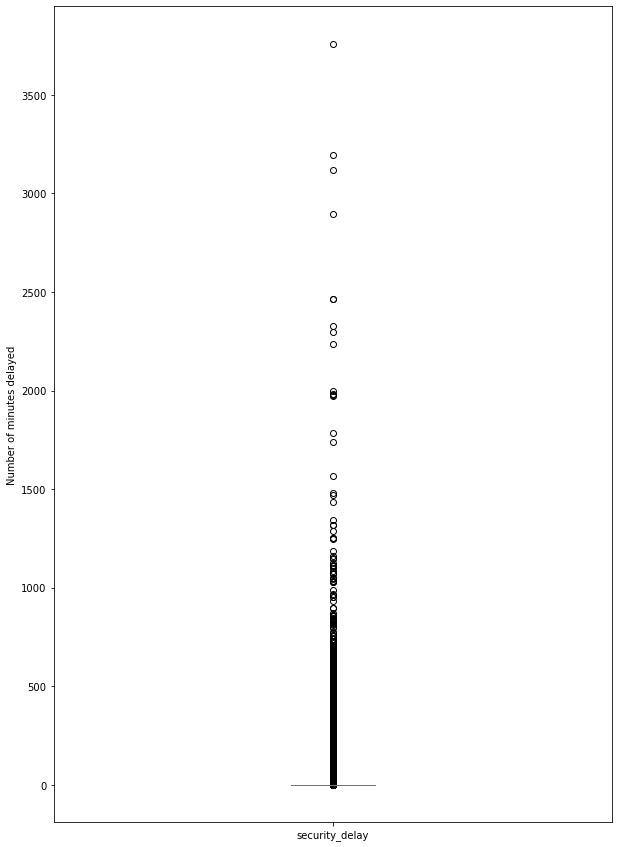

In [38]:
df1.security_delay.plot(kind="box",figsize=(10,15))
plt.ylabel("Number of minutes delayed")
plt.show()

### There is only one value which is above 3500 and that is the maximum value and there are only a few values which are above 2000.Most of the values lie in between 0 to 1000.From this we can infer that most flights have delayes from 0 to 1000 minutes due to Security issues.

In [39]:
df1.late_aircraft_delay.describe()

count    317289.000000
mean       1597.270268
std        4926.617274
min           0.000000
25%          79.000000
50%         352.000000
75%        1111.000000
max      148181.000000
Name: late_aircraft_delay, dtype: float64

In [40]:
# Lets fetch the details of the fight which had delayed for maximum time due to Late Aircraft
df1[df1.late_aircraft_delay == df1.late_aircraft_delay.max()][['year','month','carrier','carrier_name','airport','airport_name',"late_aircraft_delay"]]

,year,month,carrier,carrier_name,airport,airport_name,late_aircraft_delay
130649,2014,6,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",148181.0


### American Airlines(AA) is the carrier that has delayed for 148181 mins which is the highest time of delay in between the years 2003 and 2022 due to Late Aircraft Delay.

In [41]:
# Lets check for the cause which has caused for most most delays
carrierDelays=len(df1[df1.carrier_delay > 0])

In [42]:
weatherDelays=len(df1[df1.weather_delay > 0])

In [43]:
nasDelays=len(df1[df1.nas_delay > 0])

In [44]:
securityDelays=len(df1[df1.security_delay > 0])

In [45]:
lateAircraftDelays=len(df1[df1.late_aircraft_delay > 0])

In [46]:
delays = [carrierDelays,weatherDelays,nasDelays,securityDelays,lateAircraftDelays]
causes = ["carrierDelays","weatherDelays","nasDelays","securityDelays","lateAircraftDelays"]

In [47]:
df2 = pd.DataFrame(list(zip(causes,delays)),columns=["Cause","Total Delays"])

In [48]:
df2

,Cause,Total Delays
0,carrierDelays,300231
1,weatherDelays,190956
2,nasDelays,287507
3,securityDelays,42012
4,lateAircraftDelays,278785


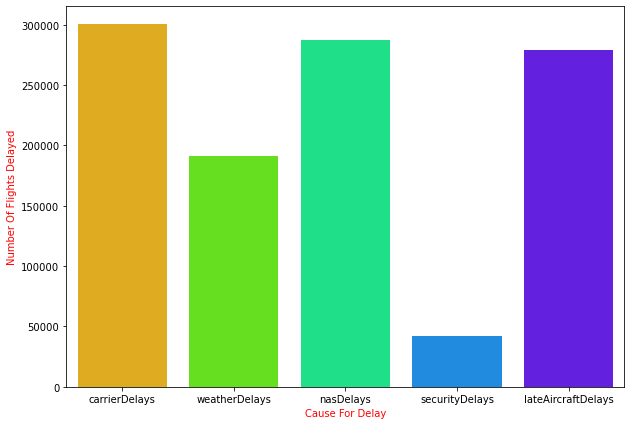

In [49]:
x=df2["Cause"]
y=df2["Total Delays"]
fig = plt.figure(figsize = (10, 7))
sns.barplot(x,y,palette="gist_rainbow")
plt.xlabel("Cause For Delay",color="red")
plt.ylabel("Number Of Flights Delayed",color="red")
plt.show()

### From the above bar graph we can clearly infer that most if the flights have delayed due to Carrier Delay followed by NAS Delay

In [50]:
# Now lets check for the airlines that has reported maximun number of delays from the year 2003 to 2022
df1[df1.arr_delay > 0].carrier.value_counts()

OO    36777
DL    26912
EV    25689
MQ    23897
AA    19569
UA    18600
WN    17554
YV    13667
AS    12627
F9    11571
OH    11540
9E    11425
B6    11419
US    10491
NW     7949
XE     7218
FL     6862
CO     6633
G4     5893
RU     4056
YX     3983
NK     3681
HA     3517
DH     1896
HP     1576
VX     1407
TZ      911
QX      808
AQ      251
Name: carrier, dtype: int64

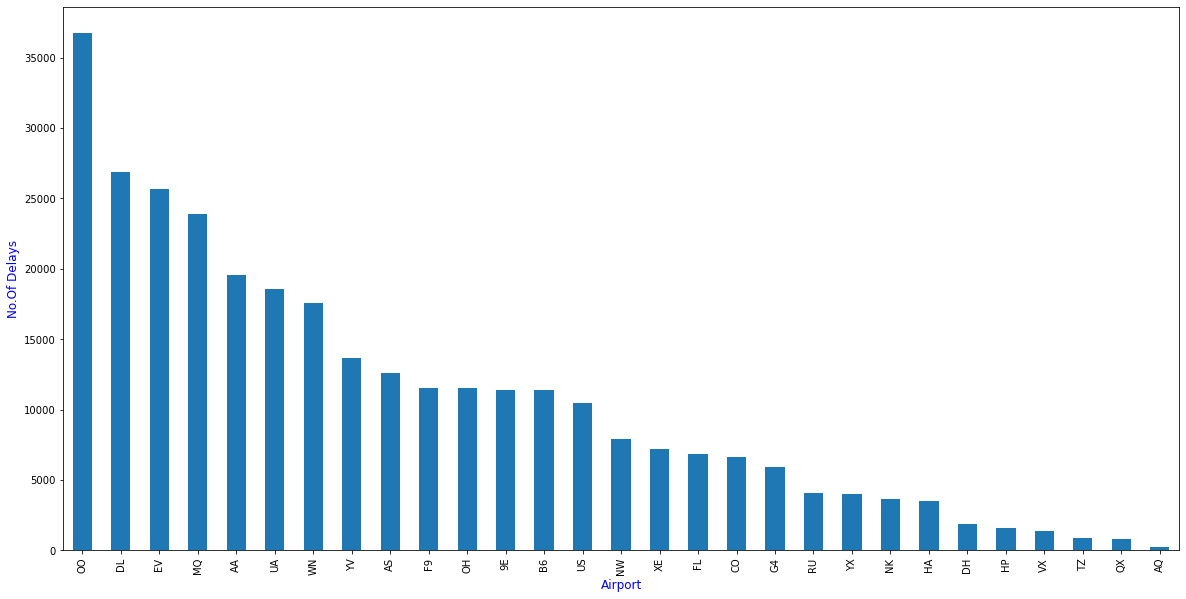

In [51]:
df1[df1.arr_delay > 0]['carrier'].value_counts().plot(kind = "bar",figsize=(20,10))
plt.xlabel("Airport",fontdict={'fontsize':12,'fontweight':3,'color':'Blue'})
plt.ylabel("No.Of Delays",fontdict={'fontsize':12,'fontweight':3,'color':'Blue'})
plt.show()

### From the graph we can infer that SkyWest Airlines (OO) is the airlines which delayed for maximum number of times from the years 2003 to 2022 and also thsi is the same Airlinees which was reported most number delays in the year 2019 too.